In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm 
import statsmodels.tsa.api as smt# for the dicley fuller stationary time series
from sklearn import preprocessing, metrics # preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
bse = yf.Ticker("^BSESN") # Ticker object for BSE stock exchange...it gets all the data..ticker is a term used in stock

In [4]:
hist = bse.history(period="max") # to get historical data only # some days are skipped in between

In [5]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0


In [22]:
hist.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-13,52694.890625,52806.859375,52545.679688,52769.730469,7900,0,0
2021-07-14,52801.441406,52978.578125,52611.968750,52904.050781,9300,0,0
2021-07-15,52968.890625,53266.121094,52948.429688,53158.851562,8100,0,0
2021-07-16,53244.398438,53290.808594,52997.089844,53140.058594,6700,0,0
2021-07-19,52606.988281,52821.171875,52405.890625,52553.398438,0,0,0


In [23]:
hist.shape

(5914, 7)

In [24]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

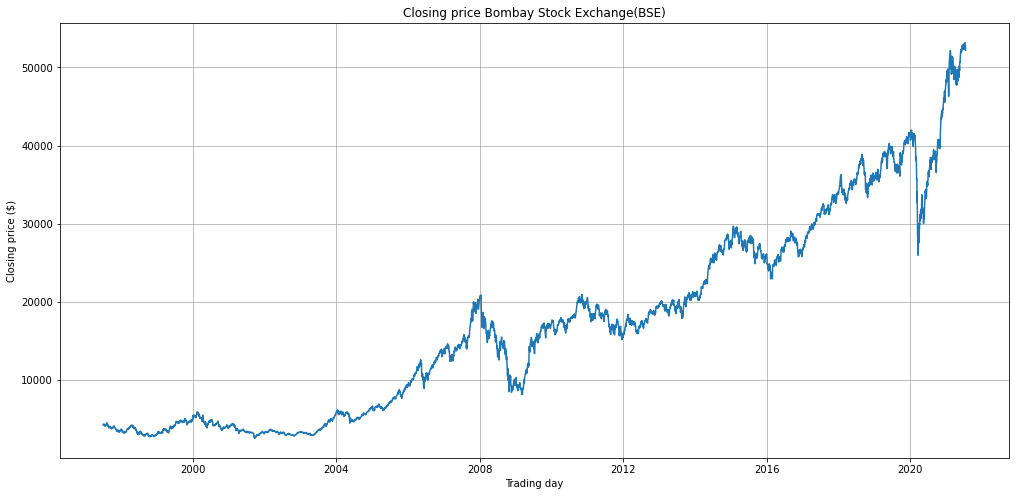

In [6]:
plt.figure(figsize=(17, 8))
plt.plot(hist.Close)
plt.title('Closing price Bombay Stock Exchange(BSE)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)
plt.show() #plotting on date and closing price

# Moving Window Average

In [7]:
rolling_avg = hist.rolling(window=50).mean()

In [27]:
rolling_avg

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-07-13,51510.666484,51687.592578,51212.844219,51474.831875,12158.0,0.0,0.0
2021-07-14,51599.575078,51769.899531,51304.522187,51558.542500,12050.0,0.0,0.0
2021-07-15,51681.320312,51855.291328,51400.501797,51656.649297,11948.0,0.0,0.0


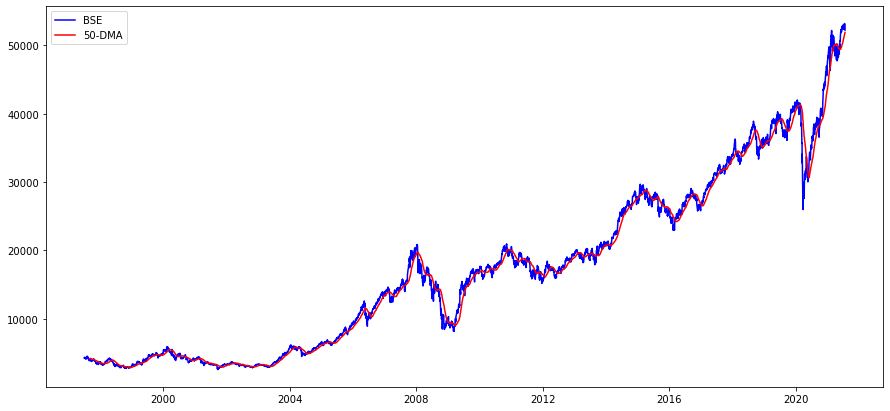

In [8]:
plt.figure(figsize=(15,7))
plt.plot(hist.Close,label='BSE', color='b')
plt.plot(rolling_avg.Close,label='50-DMA', color='r')
plt.legend()# rolling average 50 DAYS

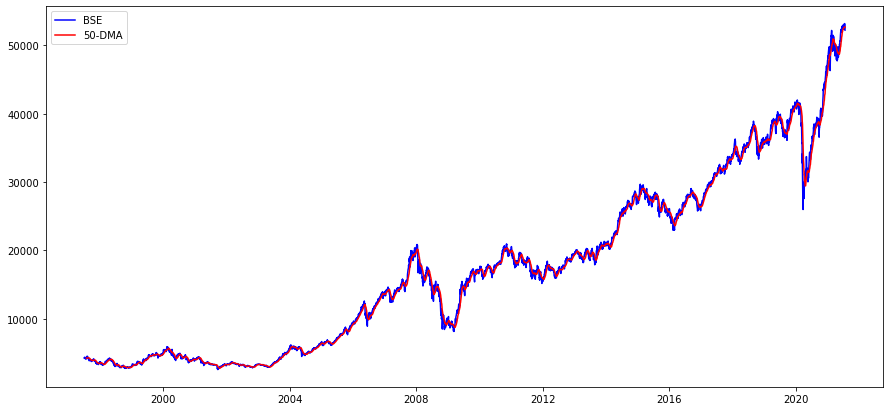

In [10]:
rolling_avg = hist.rolling(window=21).mean()
plt.figure(figsize=(15,7))
plt.plot(hist.Close,label='BSE', color='b')
plt.plot(rolling_avg.Close,label='50-DMA', color='r')
plt.legend() # ROLLING AVERAGE 3 WEEKS

No handles with labels found to put in legend.


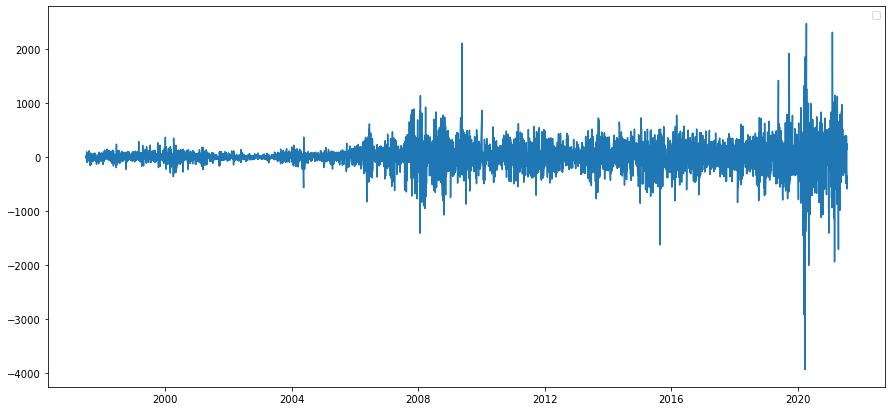

In [11]:

plt.figure(figsize=(15,7))
Diff = hist.Close - hist.Close.shift(1)
#Diff = rolling_avg.Close - rolling_avg.Close.shift(1)
plt.plot(Diff)
#converting to stable data
#rolling_avg = hist.rolling(window=20).mean()
#plt.plot(hist.Close,label='BSE', color='b')
#plt.plot(rolling_avg.Close-rolling_avg.Close.shift(-1),label='50-DMA', color='r')
plt.legend()

Time Series Analysis Plots
 Dickey-Fuller: p=0.99576


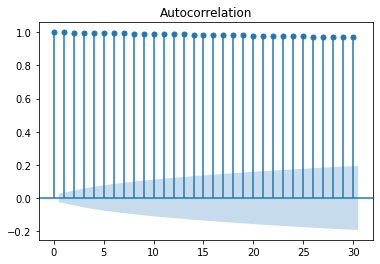

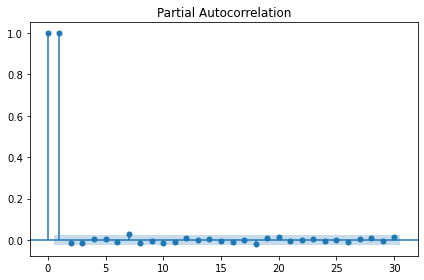

In [12]:

p_value = sm.tsa.stattools.adfuller(hist.Close)[1] #p value is not 0 means not stationary
#p_value = sm.tsa.stattools.adfuller(rolling_avg.Close[39:])[1] #p value is not 0 means not stationary

print('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
smt.graphics.plot_acf(hist.Close, lags=30)#autocorealtion graph
smt.graphics.plot_pacf(hist.Close, lags=30)#partial auto corelation graph
#smt.graphics.plot_acf(rolling_avg.Close[39:], lags=30)#autocorealtion graph
#smt.graphics.plot_pacf(rolling_avg.Close[39:], lags=30)#partial auto corelation graph

plt.tight_layout()


Time Series Analysis Plots
 Dickey-Fuller: p=0.00000


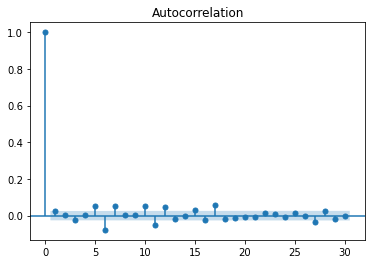

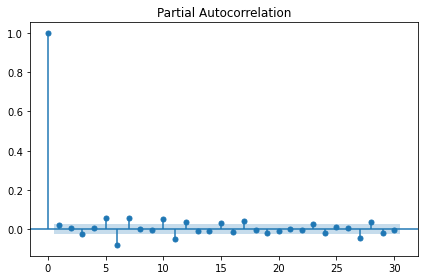

In [13]:
p_value = sm.tsa.stattools.adfuller(Diff[1:])[1] #p value is not 0 means not stationary
#p_value = sm.tsa.stattools.adfuller(Diff[31:])[1] #p value is not 0 means not stationary
print('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
smt.graphics.plot_acf(Diff[1:], lags=30)#autocorealtion graph
smt.graphics.plot_pacf(Diff[1:], lags=30)#partial auto corelation graph
# time series is stationary now as p value is 0
#smt.graphics.plot_acf(Diff[31:], lags=30)#autocorealtion graph
#smt.graphics.plot_pacf(Diff[31:], lags=30)#partial auto corelation graph
plt.tight_layout()

In [37]:
#Reading the textual news data

df_news=pd.read_csv("india-news-headlines.csv")
df_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [40]:
df_news.headline_text[2]

"America's unwanted heading for India?"

In [41]:
 df_news.isnull().count()

publish_date         3424067
headline_category    3424067
headline_text        3424067
dtype: int64

In [42]:
df_news=df_news.drop_duplicates()

In [43]:
df_news.publish_date=pd.to_datetime( df_news.publish_date ,format='%Y%m%d')

In [44]:
df_news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [45]:
df_news=df_news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)) # combining all the headline for the day

In [47]:
df_news.head()

publish_date
2001-01-02    Status quo will not be disturbed at Ayodhya; s...
2001-01-03    Powerless north India gropes in the dark,Think...
2001-01-04    The string that pulled Stephen Hawking to Indi...
2001-01-05    Light combat craft takes India into club class...
2001-01-06    Light combat craft takes India into club class...
Name: headline_text, dtype: object

In [50]:
df_news.tail()

publish_date
2020-12-27    #BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28    Horoscope Today; 28 December 2020: Check astro...
2020-12-29    Man recovers charred remains of 'thief' from h...
2020-12-30    Numerology Readings 30 December 2020: Predicti...
2020-12-31    Horoscope Today; 31 December 2020: Check astro...
Name: headline_text, dtype: object

In [51]:
df_stock=pd.concat([hist,df_news],axis=1)
df_stock.dropna(axis=0, inplace=True)
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,headline_text
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0.0,0.0,0.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0.0,0.0,0.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0.0,0.0,0.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0.0,0.0,0.0,Light combat craft takes India into club class...
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0.0,0.0,0.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
...,...,...,...,...,...,...,...,...
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,13700.0,0.0,0.0,How to set the mood for sex during cold winter...
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,9600.0,0.0,0.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,12800.0,0.0,0.0,Man recovers charred remains of 'thief' from h...
2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,15600.0,0.0,0.0,Numerology Readings 30 December 2020: Predicti...


In [52]:
df_stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,headline_text
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,13700.0,0.0,0.0,How to set the mood for sex during cold winter...
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,9600.0,0.0,0.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,12800.0,0.0,0.0,Man recovers charred remains of 'thief' from h...
2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,15600.0,0.0,0.0,Numerology Readings 30 December 2020: Predicti...
2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,13900.0,0.0,0.0,Horoscope Today; 31 December 2020: Check astro...


In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [61]:
sid = SentimentIntensityAnalyzer()

In [63]:

df_stock['Compound'] = [sid.polarity_scores(v)['compound'] for v in df_stock['headline_text']]
df_stock['Negative'] = [sid.polarity_scores(v)['neg'] for v in df_stock['headline_text']]
df_stock['Neutral'] = [sid.polarity_scores(v)['neu'] for v in df_stock['headline_text']]
df_stock['Positive'] = [sid.polarity_scores(v)['pos'] for v in df_stock['headline_text']]
df_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,headline_text,Compound,Negative,Neutral,Positive
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0.0,0.0,0.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621,0.119,0.817,0.064
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0.0,0.0,0.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0.0,0.0,0.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.077,0.843,0.080
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0.0,0.0,0.0,Light combat craft takes India into club class...,0.9253,0.104,0.744,0.152
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0.0,0.0,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026


In [64]:
df_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,headline_text,Compound,Negative,Neutral,Positive
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0.0,0.0,0.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621,0.119,0.817,0.064
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0.0,0.0,0.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0.0,0.0,0.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.077,0.843,0.080
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0.0,0.0,0.0,Light combat craft takes India into club class...,0.9253,0.104,0.744,0.152
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0.0,0.0,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026


In [69]:
#Removing headline data

#df_stock.drop((['headline_text']), axis=1, inplace=True)
df_stock1 = df_stock[['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High', 'Low', 'Volume']]
df_stock1.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
2001-01-02,4018.879883,-0.9621,0.119,0.817,0.064,3953.219971,4028.570068,3929.370117,0.0
2001-01-03,4060.020020,0.6322,0.084,0.817,0.098,3977.580078,4067.659912,3977.580078,0.0
2001-01-04,4115.370117,0.6648,0.077,0.843,0.080,4180.970215,4180.970215,4109.549805,0.0
2001-01-05,4183.729980,0.9253,0.104,0.744,0.152,4116.339844,4195.009766,4115.350098,0.0
2001-01-08,4120.430176,-0.9638,0.119,0.855,0.026,4164.759766,4206.720215,4101.529785,0.0


In [70]:
#Saving the compiled dataframe in a excel sheet that can be used later

df_stock1.to_csv('stock_data.csv')

In [73]:
#Reading the stock_data 
 # it takes a lot of time everytime to generate the sentiment analysis report
stock_file=pd.read_csv('stock_data.csv')
stock_file.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
stock_file.set_index('Date', inplace=True)
stock_file.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,4018.879883,-0.9621,0.119,0.817,0.064,3953.219971,4028.570068,3929.370117,0.0
2001-01-03,4060.020020,0.6322,0.084,0.817,0.098,3977.580078,4067.659912,3977.580078,0.0
2001-01-04,4115.370117,0.6648,0.077,0.843,0.080,4180.970215,4180.970215,4109.549805,0.0
2001-01-05,4183.729980,0.9253,0.104,0.744,0.152,4116.339844,4195.009766,4115.350098,0.0
2001-01-08,4120.430176,-0.9638,0.119,0.855,0.026,4164.759766,4206.720215,4101.529785,0.0


In [75]:
stock_file.isna().any()

Close       False
Compound    False
Negative    False
Neutral     False
Positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [76]:
stock_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4893 entries, 2001-01-02 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4893 non-null   float64
 1   Compound  4893 non-null   float64
 2   Negative  4893 non-null   float64
 3   Neutral   4893 non-null   float64
 4   Positive  4893 non-null   float64
 5   Open      4893 non-null   float64
 6   High      4893 non-null   float64
 7   Low       4893 non-null   float64
 8   Volume    4893 non-null   float64
dtypes: float64(9)
memory usage: 382.3+ KB


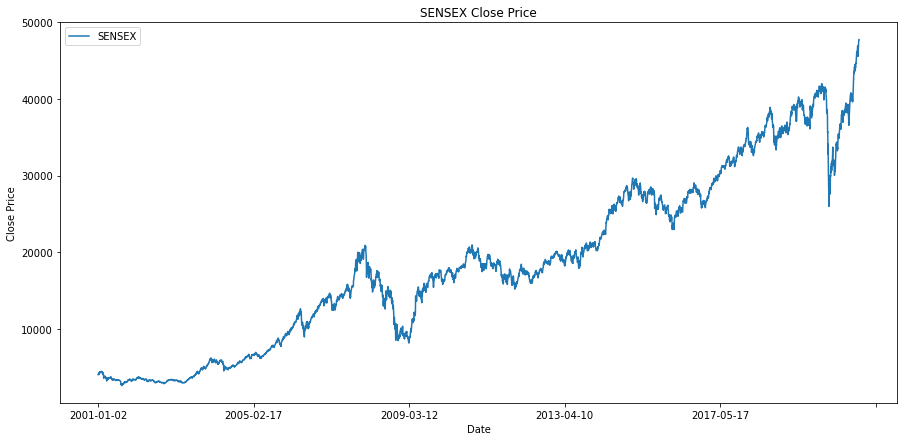

In [79]:
#Visualing the close price over the period of analysis

plt.figure(figsize=(15,7))
stock_file['Close'].plot(label='SENSEX')
plt.title("SENSEX Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

In [84]:
    #Calculating the number of datapoints for training and testing
percentage_of_data = 1.0 #all data??
    
total_data = len(stock_file)
data_to_use = int(percentage_of_data*(total_data-1))

train_end = int(data_to_use*0.8)
   
start = total_data - data_to_use

print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3913
Number of records in Test Data: 980


In [86]:
#Allocating the datapoints for each column

steps_to_predict = 1

close_price = stock_file.iloc[start:total_data,0]        
compound = stock_file.iloc[start:total_data,1]           
negative = stock_file.iloc[start:total_data,2]           
neutral = stock_file.iloc[start:total_data,3]            
positive = stock_file.iloc[start:total_data,4]           
open_price = stock_file.iloc[start:total_data,5]         
high = stock_file.iloc[start:total_data,6]               
low = stock_file.iloc[start:total_data,7]                
volume = stock_file.iloc[start:total_data,8]             

print("Close Price:")
close_price

Close Price:


Date
2001-01-03     4060.020020
2001-01-04     4115.370117
2001-01-05     4183.729980
2001-01-08     4120.430176
2001-01-09     4125.310059
                  ...     
2020-12-24    46973.539062
2020-12-28    47353.750000
2020-12-29    47613.078125
2020-12-30    47746.218750
2020-12-31    47751.328125
Name: Close, Length: 4892, dtype: float64

In [87]:
# shifting next day close .....yesterdays data will be used for next day
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2001-01-03,4060.020020,4115.370117,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,4183.729980,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,4120.430176,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,4125.310059,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,4047.639893,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
2001-01-10,4047.639893,4296.689941,-0.5719,0.9295,0.0,4151.580078,4155.859863,4035.439941
2001-01-23,4296.689941,4326.419922,0.9295,-0.9039,0.0,4277.830078,4321.750000,4272.870117
2001-01-24,4326.419922,4330.220215,-0.9039,-0.9838,0.0,4320.509766,4339.410156,4295.709961
2001-01-25,4330.220215,4234.569824,-0.9838,0.9697,0.0,4327.839844,4341.330078,4273.700195


In [88]:
# setting the target variable as the shifted close_price

y = data['close_price_shifted']
y

Date
2001-01-03     4115.370117
2001-01-04     4183.729980
2001-01-05     4120.430176
2001-01-08     4125.310059
2001-01-09     4047.639893
                  ...     
2020-12-23    46973.539062
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
2020-12-30    47751.328125
Name: close_price_shifted, Length: 4891, dtype: float64

In [89]:
# setting the future dataset for training the model

cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2001-01-03,4060.020020,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
...,...,...,...,...,...,...,...
2020-12-23,46444.179688,-0.9996,-0.9971,10500.0,46072.300781,46513.320312,45899.101562
2020-12-24,46973.539062,-0.9971,-0.9997,13700.0,46743.488281,47053.398438,46539.019531
2020-12-28,47353.750000,-0.9997,-0.9998,9600.0,47153.589844,47406.718750,47148.238281


In [92]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

x, y

(array([[-0.93532553,  0.6322    ,  0.6648    , ..., -0.93997007,
         -0.93861222, -0.93822641],
        [-0.93287349,  0.6648    ,  0.9253    , ..., -0.93096396,
         -0.93359019, -0.93233057],
        [-0.92984511,  0.9253    , -0.9638    , ..., -0.93382579,
         -0.93296794, -0.93207144],
        ...,
        [ 0.98261339, -0.9997    , -0.9998    , ...,  0.97186267,
          0.98222136,  0.99045457],
        [ 0.99410179, -0.9998    , -0.9998    , ...,  0.98572369,
          0.99586481,  1.        ],
        [ 1.        , -0.9998    , -0.9996    , ...,  1.        ,
          1.        ,  0.99984189]]),
 array([[-0.93288109],
        [-0.92985305],
        [-0.93265695],
        ...,
        [ 0.99387613],
        [ 0.99977368],
        [ 1.        ]]))

In [94]:
#preparing training and test dataset

X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets

print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (3913, 7) and y: (3913, 1)
Number of rows and columns in the Test set X: (977, 7) and y: (977, 1)


In [95]:
# reshaping the feature dataset into 3D for feeding into the LSTM model

X_train = X_train.reshape(X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3913, 7, 1)
Shape of Test set X: (977, 7, 1)


In [116]:

from tensorflow.keras.models import Sequential # fol lstm
from tensorflow.keras.layers import Dense, LSTM, Dropout, Dense, Activation


In [117]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2021)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [118]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
392/392 [==============================] - 10s 12ms/step - loss: 0.0286 - val_loss: 0.0224
Epoch 2/10
392/392 [==============================] - 4s 9ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 3/10
392/392 [==============================] - 3s 9ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/10
392/392 [==============================] - 4s 9ms/step - loss: 0.0013 - val_loss: 2.4147e-04
Epoch 5/10
392/392 [==============================] - 3s 9ms/step - loss: 0.0012 - val_loss: 9.0689e-04
Epoch 6/10
392/392 [==============================] - 4s 9ms/step - loss: 0.0012 - val_loss: 6.0983e-04
Epoch 7/10
392/392 [==============================] - 3s 9ms/step - loss: 0.0012 - val_loss: 2.4363e-04
Epoch 8/10
392/392 [==============================] - 3s 9ms/step - loss: 0.0010 - val_loss: 2.3455e-04
Epoch 9/10
392/392 [==============================] - 4s 9ms/step - loss: 9.2195e-04 - val_loss: 4.7323e-04
Epoch 10/10
392/392 [==============================] - 4s 9ms/step - l

In [119]:
#Prediction of stock data using the test dataset

predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[26636.965],
       [26849.588],
       [27008.057],
       [27127.14 ],
       [27050.982]], dtype=float32)

In [120]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

977/977 [==============================] - 2s 2ms/step - loss: 7.2407e-04
Train Loss = 0.0005
Test Loss = 0.0007


In [121]:
# calculating root mean squared error using sklearn.metrics package

rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 35974.9702


In [122]:
# unscaling the test datasets
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

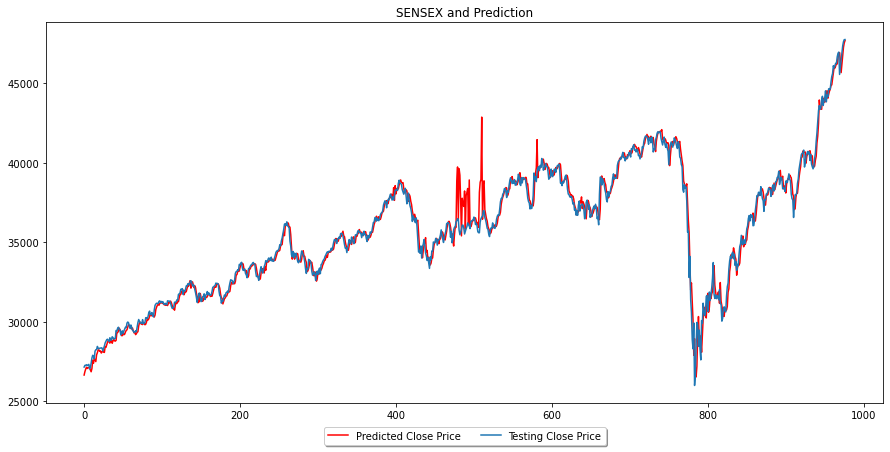

In [123]:
# plotting the prediction and original dataset on the same plot
    
plt.figure(figsize=(15,7))
plt.plot(predictions, label="Predicted Close Price", color='r')
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.title('SENSEX and Prediction')
plt.show()